# National Health and Nutrition Examination Survey

### 2007 - 2008 Data Documentation, Codebook and Frequencies

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import pandas as pd
import missingno as msno

In [11]:
metademo = {
    "SEQN": "Respondent sequence number",
    "RIAGENDR": "Gender",
    "RIDAGEYR": "Age in years"
}

metacbc = {
    'LBXWBCSI':('White blood cell count','10³ cells/uL'),
    'LBXLYPCT':('Lymphocyte percent','%'),
    'LBXMOPCT':('Monocyte percent','%'),
    'LBXNEPCT':('Segmented neutrophils percent','%'),
    'LBXEOPCT':('Eosinophils percent','%'),
    'LBXBAPCT':('Basophils percent','%'),
    'LBDLYMNO':('Lymphocyte number','10³ cells/uL'),
    'LBDMONO':('Monocyte number','10³ cells/uL'),
    'LBDNENO':('Segmented neutrophils number','10³ cells/uL'),
    'LBDEONO':('Eosinophils number','10³ cells/uL'),
    'LBDBANO':('Basophils number','10³ cells/uL'),
    'LBXRBCSI':('Red blood cell count','10⁶ cells/uL'),
    'LBXHGB':('Hemoglobin','g/dL'),
    'LBXHCT':('Hematocrit','%'),
    'LBXMCVSI':('Mean cell volume','fL'),
    'LBXMCHSI':('Mean cell hemoglobin','pg'),
    'LBXMC':('Mean cell hemoglobin concentration','g/dL'),
    'LBXRDW':('Red cell distribution width','%'),
    'LBXPLTSI':('Platelet count','10³ cells/uL'),
    'LBXMPSI':('Mean platelet volume','fL')
}

metabio = {
    "LBXSAL":("Albumin","g/dL"),
    "LBDSALSI":("Albumin","g/L"),
    "LBXSATSI":("Alanine aminotransferase (ALT)" ,"U/L"),
    "LBXSASSI":("Asparate aminotransferase (AST)", "U/L"),
    "LBXSAPSI":("Alkaline phosphotase", "U/L"),
    "LBXSBU":("Blood urea nitrogen", "mg/dL"),
    "LBXSCA":("Total calcium", "mg/dL"),
    "LBDSCASI":("Total calcium", "mmol/L"),
    "LBDSBUSI":("Blood urea nitrogen","mmol/L"),
    "LBXSCH":("Cholesterol", "mg/dL"),
    "LBDSCHSI":("Cholesterol", "mmol/L"),
    "LBXSC3SI":("Bicarbonate", "mmol/L"),
    "LBXSCR":("Creatinine", "mg/dL"),
    "LBDSCRSI":("Creatinine", "µmol/L"),
    "LBXSGTSI":("Gamma glutamyl transferase", "U/L)"),
    "LBXSGL":("Glucose, serum", "mg/dL"),
    "LBDSGLSI":("Glucose, serum", "mmol/L"),
    "LBXSIR":("Iron, refigerated", "ug/dL"),
    "LBDSIRSI":("Iron, refigerated", "umol/L"),
    "LBXSLDSI":("Lactate dehydrogenase LDH", "U/L"),
    "LBXSPH": ("Phosphorus", "mg/dL"),
    "LBDSPHSI":("Phosphorus", "mmol/L"),
    "LBXSTB": ("Total bilirubin", "mg/dL"),
    "LBDSTBSI": ("Bilirubin, total", "umol/L"),
    "LBXSTP": ("Total protein", "g/dL"),
    "LBDSTPSI": ("Total protein", "g/L"),
    "LBXSTR": ("Triglycerides", "mg/dL"),
    "LBDSTRSI": ("Triglycerides", "mmol/L"),
    "LBXSUA": ("Uric acid", "mg/dL"),
    "LBDSUASI": ("Uric acid", "umol/L"),
    "LBXSNASI": ("Sodium", "mmol/L"),
    "LBXSKSI": ("Potassium", "mmol/L"),
    "LBXSCLSI": ("Chloride", "mmol/L"),
    "LBXSOSSI": ("Osmolality", "mmol/Kg"),
    "LBXSGB": ("Globulin", "g/dL"),
    "LBDSGBSI": ("Globulin", "g/L")
}

---

# Complete Blood Count with 5-Part Differential (CBC)
* Category: Hematology.
* Range: 2007-2008
* Link: https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2007/DataFiles/CBC_E.htm

Based on the Beckman Coulter methodology of counting and sizing (Beckman Coulter DxH).

Prefixes and suffixes explained:

* LBX- = Lab sample
* -SI = [...] Count/Volume
* -PCT = [...] Percent
* -NO = [...] Number

In [3]:
cbc = pd.read_sas('CBC_E.xpt')
cbc.describe()

SEQN     LBXWBCSI     LBXLYPCT     LBXMOPCT     LBXNEPCT  \
count   9307.000000  8266.000000  8250.000000  8250.000000  8250.000000   
mean   46550.822714     7.311348    33.704000     7.998752    54.586848   
std     2934.031545     2.404623    10.681782     2.400728    11.711961   
min    41475.000000     1.500000     4.900000     0.700000     5.300000   
25%    44015.000000     5.800000    26.400000     6.400000    47.600000   
50%    46537.000000     7.000000    32.500000     7.800000    55.700000   
75%    49100.500000     8.475000    39.800000     9.300000    62.700000   
max    51623.000000    83.200000    85.500000    44.500000    92.100000   

           LBXEOPCT      LBXBAPCT     LBDLYMNO      LBDMONO      LBDNENO  ...  \
count  8.250000e+03  8.250000e+03  8249.000000  8249.000000  8249.000000  ...   
mean   3.062727e+00  6.877576e-01     2.419154     0.566796     4.058831  ...   
std    2.393630e+00  5.104251e-01     1.335825     0.207181     1.737990  ...   
min    5.397605e-79  5.397605e-79     0.400000     0.100000     0.200000  ...   
25%    1.600000e+00  4.000000e-01     1.800000     0.400000     2.800000  ...   
50%    2.400000e+00  6.000000e-01     2.200000     0.500000     3.800000  ...   
75%    3.800000e+00  8.000000e-01     2.800000     0.700000     4.900000  ...   
max    2.850000e+01  1.590000e+01    71.100000     5.500000    20.500000  ...   

            LBDBANO     LBXRBCSI       LBXHGB       LBXHCT     LBXMCVSI  \
count  8.249000e+03  8267.000000  8267.000000  8267.000000  8267.000000   
mean   4.136259e-02     4.672175    13.901077    40.354337    86.552292   
std    6.638355e-02     0.475615     1.548729     4.305211     6.115567   
min    5.397605e-79     2.490000     7.500000    22.400000    55.900000   
25%    5.397605e-79     4.360000    12.900000    37.300000    83.100000   
50%    5.397605e-79     4.650000    13.800000    40.200000    86.900000   
75%    1.000000e-01     4.990000    15.000000    43.500000    90.600000   
max    2.100000e+00     6.970000    19.700000    56.300000   125.300000   

          LBXMCHSI        LBXMC       LBXRDW     LBXPLTSI      LBXMPSI  
count  8267.000000  8267.000000  8267.000000  8267.000000  8267.000000  
mean     29.815882    34.431596    12.804330   283.010161     7.640873  
std       2.428465     0.965835     1.173008    76.646842     0.854055  
min      18.000000    30.000000     6.300000    28.000000     5.100000  
25%      28.600000    33.800000    12.100000   232.000000     7.100000  
50%      30.000000    34.500000    12.500000   273.000000     7.600000  
75%      31.300000    35.100000    13.100000   324.000000     8.100000  
max      60.800000    42.400000    37.800000  1000.000000    12.600000  

[8 rows x 21 columns]

<Axes: >

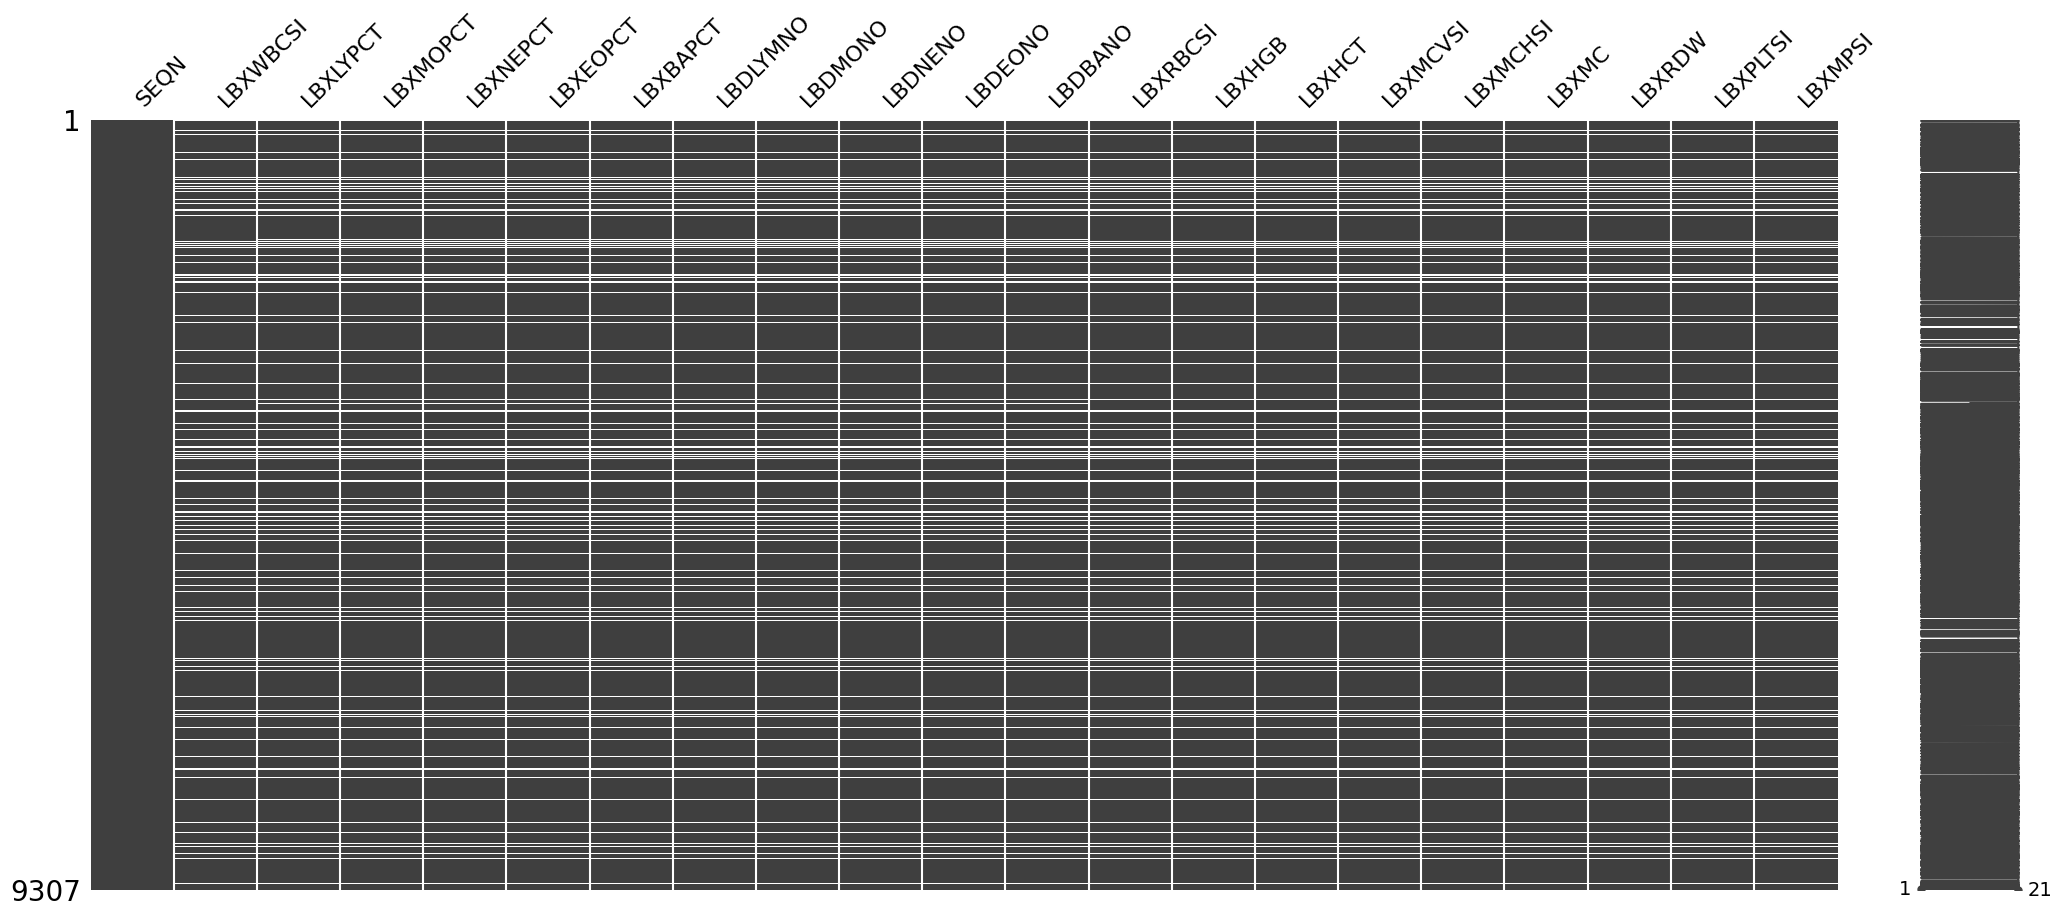

In [4]:
msno.matrix(cbc)

Missing values are not at random. Each sample falls into one of these categories:
* All values listed.
* Not a single value listed.
* Missing the concentration values of white cells subtypes.

In [5]:
cbc.loc[cbc['LBXLYPCT'].isna() & ~cbc['LBXWBCSI'].isna()]

SEQN  LBXWBCSI  LBXLYPCT  LBXMOPCT  LBXNEPCT  LBXEOPCT  LBXBAPCT  \
310   41819.0       9.9       NaN       NaN       NaN       NaN       NaN   
1242  42826.0       6.1       NaN       NaN       NaN       NaN       NaN   
1444  43050.0       4.6       NaN       NaN       NaN       NaN       NaN   
2815  44541.0       5.7       NaN       NaN       NaN       NaN       NaN   
3300  45066.0      26.3       NaN       NaN       NaN       NaN       NaN   
3426  45200.0       5.4       NaN       NaN       NaN       NaN       NaN   
4112  45940.0       6.6       NaN       NaN       NaN       NaN       NaN   
4194  46036.0      10.0       NaN       NaN       NaN       NaN       NaN   
4854  46764.0       8.1       NaN       NaN       NaN       NaN       NaN   
5132  47068.0       8.0       NaN       NaN       NaN       NaN       NaN   
5333  47286.0       8.9       NaN       NaN       NaN       NaN       NaN   
6846  48954.0       9.0       NaN       NaN       NaN       NaN       NaN   
7188  49323.0       5.4       NaN       NaN       NaN       NaN       NaN   
7235  49373.0       4.0       NaN       NaN       NaN       NaN       NaN   
8076  50290.0      15.1       NaN       NaN       NaN       NaN       NaN   
8872  51153.0       6.6       NaN       NaN       NaN       NaN       NaN   
9144  51446.0       4.9       NaN       NaN       NaN       NaN       NaN   

      LBDLYMNO  LBDMONO  LBDNENO  ...  LBDBANO  LBXRBCSI  LBXHGB  LBXHCT  \
310        NaN      NaN      NaN  ...      NaN      4.77    13.9    40.8   
1242       NaN      NaN      NaN  ...      NaN      4.07     8.4    26.3   
1444       NaN      NaN      NaN  ...      NaN      3.95    10.7    31.5   
2815       NaN      NaN      NaN  ...      NaN      4.22    12.4    34.8   
3300       NaN      NaN      NaN  ...      NaN      5.10    15.0    41.3   
3426       NaN      NaN      NaN  ...      NaN      4.40     8.2    26.7   
4112       NaN      NaN      NaN  ...      NaN      3.90    11.6    33.0   
4194       NaN      NaN      NaN  ...      NaN      3.96    11.8    35.6   
4854       NaN      NaN      NaN  ...      NaN      3.24     9.4    28.9   
5132       NaN      NaN      NaN  ...      NaN      3.72    11.2    32.9   
5333       NaN      NaN      NaN  ...      NaN      4.10    12.4    34.8   
6846       NaN      NaN      NaN  ...      NaN      4.40    10.8    32.3   
7188       NaN      NaN      NaN  ...      NaN      4.48    11.3    34.0   
7235       NaN      NaN      NaN  ...      NaN      4.98    12.9    39.5   
8076       NaN      NaN      NaN  ...      NaN      4.74    12.9    37.8   
8872       NaN      NaN      NaN  ...      NaN      5.22    14.7    43.8   
9144       NaN      NaN      NaN  ...      NaN      4.74    12.7    39.4   

      LBXMCVSI  LBXMCHSI  LBXMC  LBXRDW  LBXPLTSI  LBXMPSI  
310       85.5      29.2   34.1    12.4     304.0      8.6  
1242      64.6      20.6   31.9    23.0     629.0      6.8  
1444      79.9      27.0   33.8    15.8     268.0      7.1  
2815      82.6      29.3   35.6    12.2     274.0      7.9  
3300      81.1      29.3   36.2    15.1    1000.0      7.6  
3426      60.7      18.7   30.7    18.1     199.0      8.1  
4112      84.5      29.9   35.3    11.0     372.0      8.0  
4194      89.8      29.7   33.0    14.4     387.0      7.6  
4854      89.2      29.1   32.6    25.0     232.0      8.2  
5132      88.4      30.0   33.9    14.4     296.0      6.8  
5333      84.8      30.3   35.7    12.5     325.0      7.5  
6846      73.4      24.5   33.4    14.7     347.0      8.1  
7188      75.8      25.2   33.3    14.8     208.0     10.1  
7235      79.4      25.8   32.5    15.6     120.0     10.9  
8076      79.7      27.2   34.1    16.0     364.0      8.7  
8872      83.8      28.1   33.5    13.4     285.0      9.1  
9144      83.2      26.7   32.2    14.8     279.0      7.6  

[17 rows x 21 columns]

Reasons why the values are missing seems to be related to the sampling practice: either not providing biospecimens, not enough volume or values below the lower limit of detection.

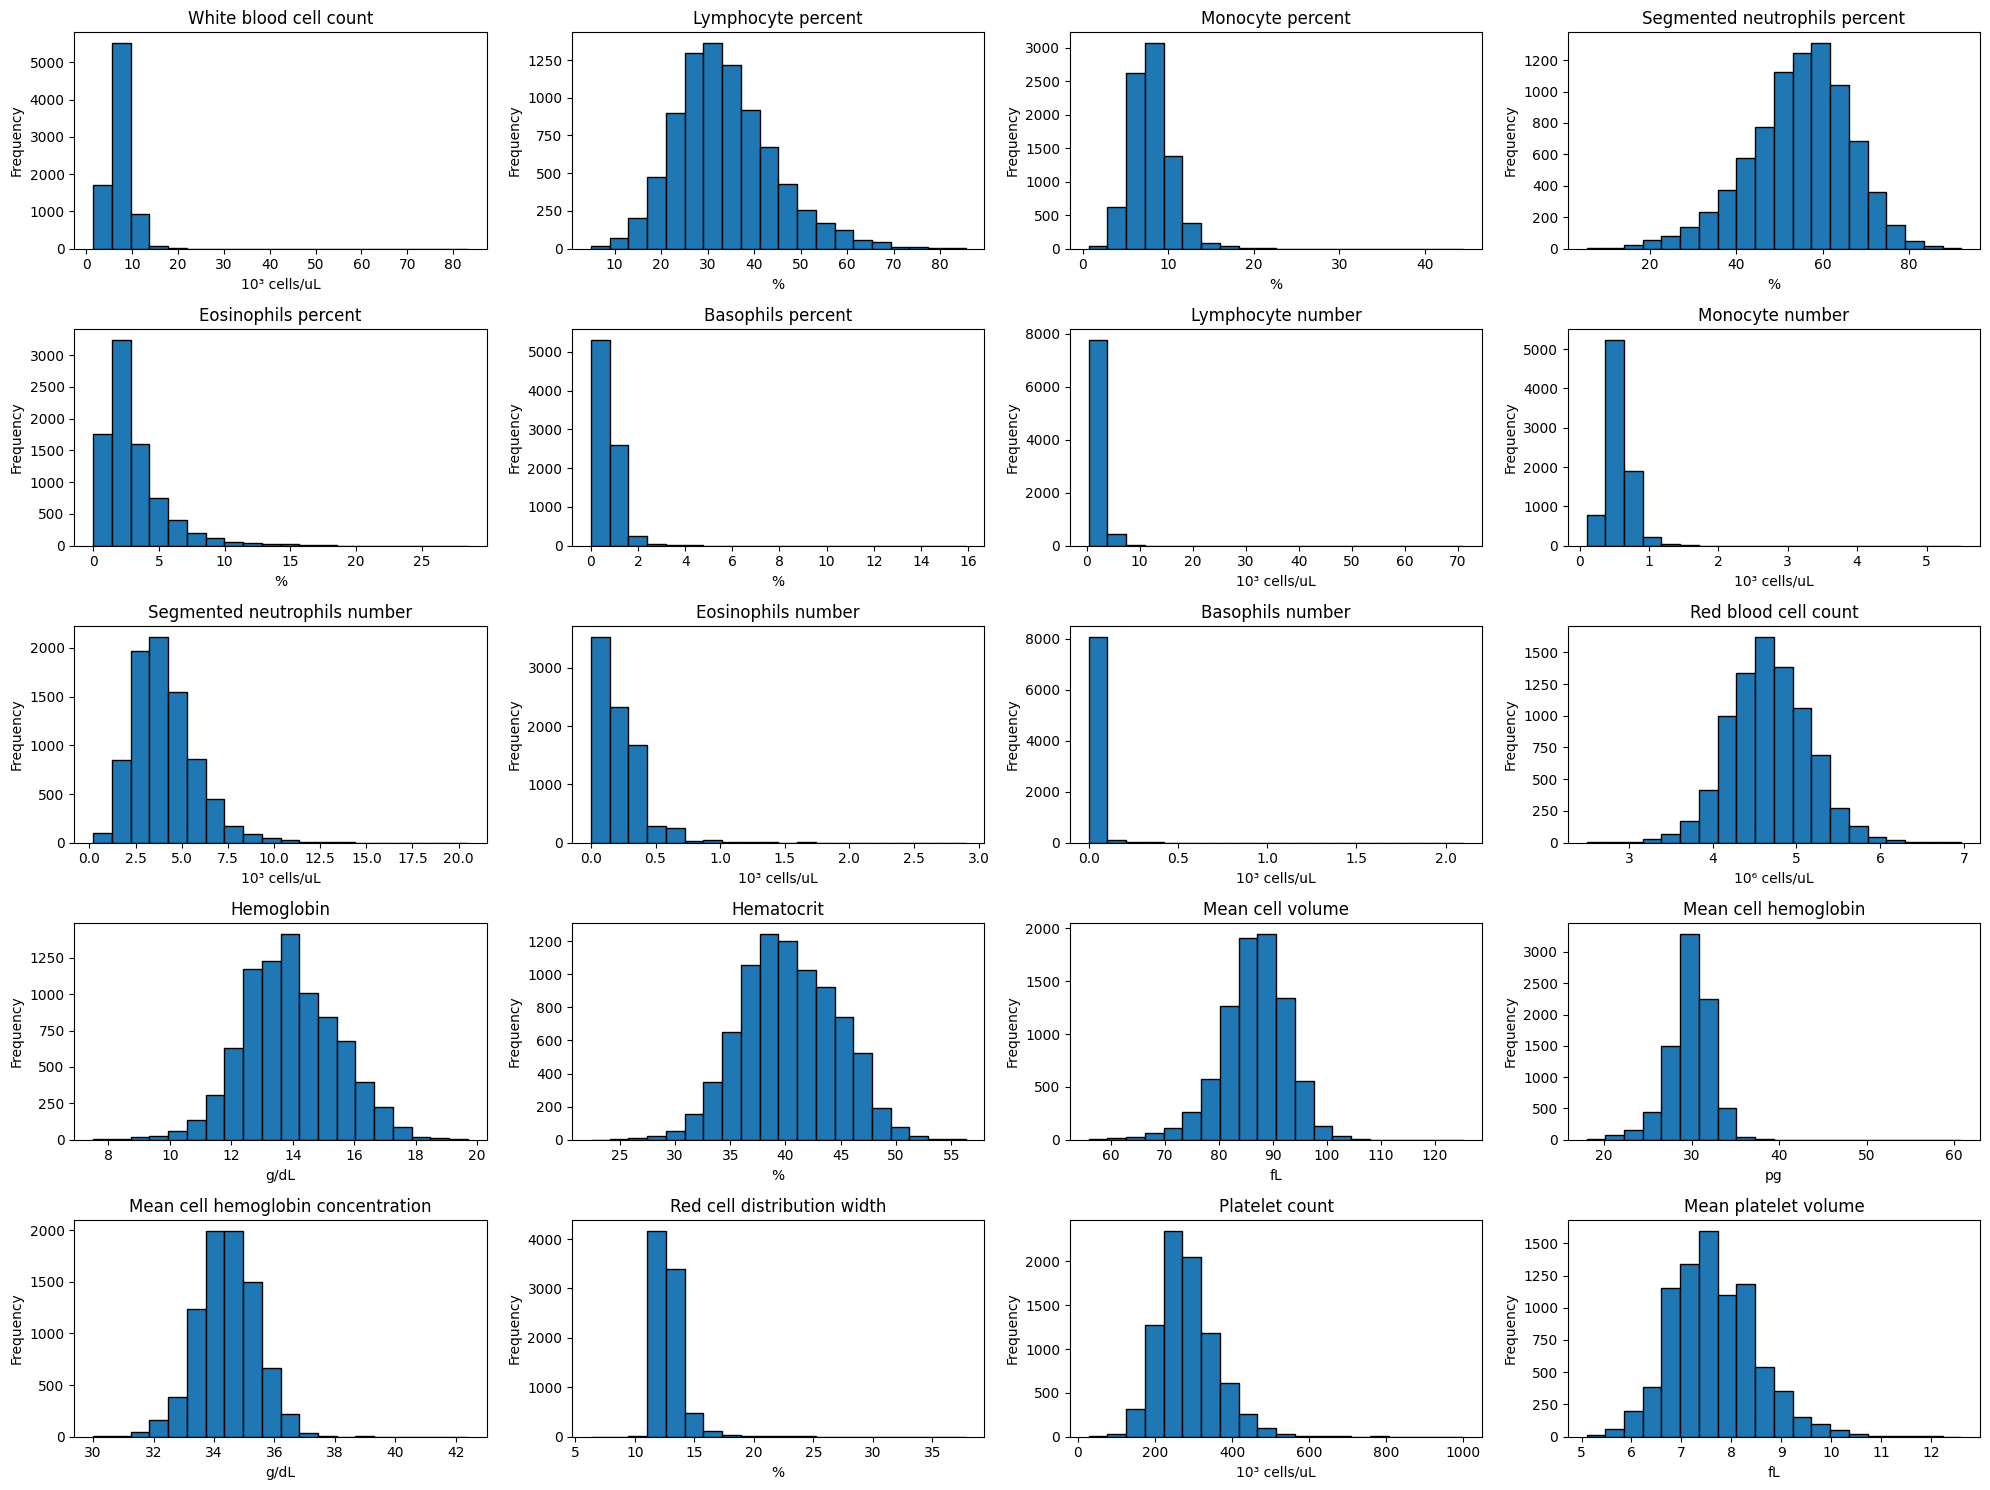

In [6]:
fig, axes = plt.subplots(5,4,figsize=(20,15))
axes = axes.flatten()

for i, (col, (name, unit)) in enumerate(metacbc.items()):
    ax = axes[i]
    ax.hist(cbc[col].dropna(),bins=20,edgecolor='black')
    ax.set_title(name)
    ax.set_xlabel(unit)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

All values are within the lower and upper limits of detection. No apparent cases of extreme outliers.
To be determined the reference intervals from each variable.

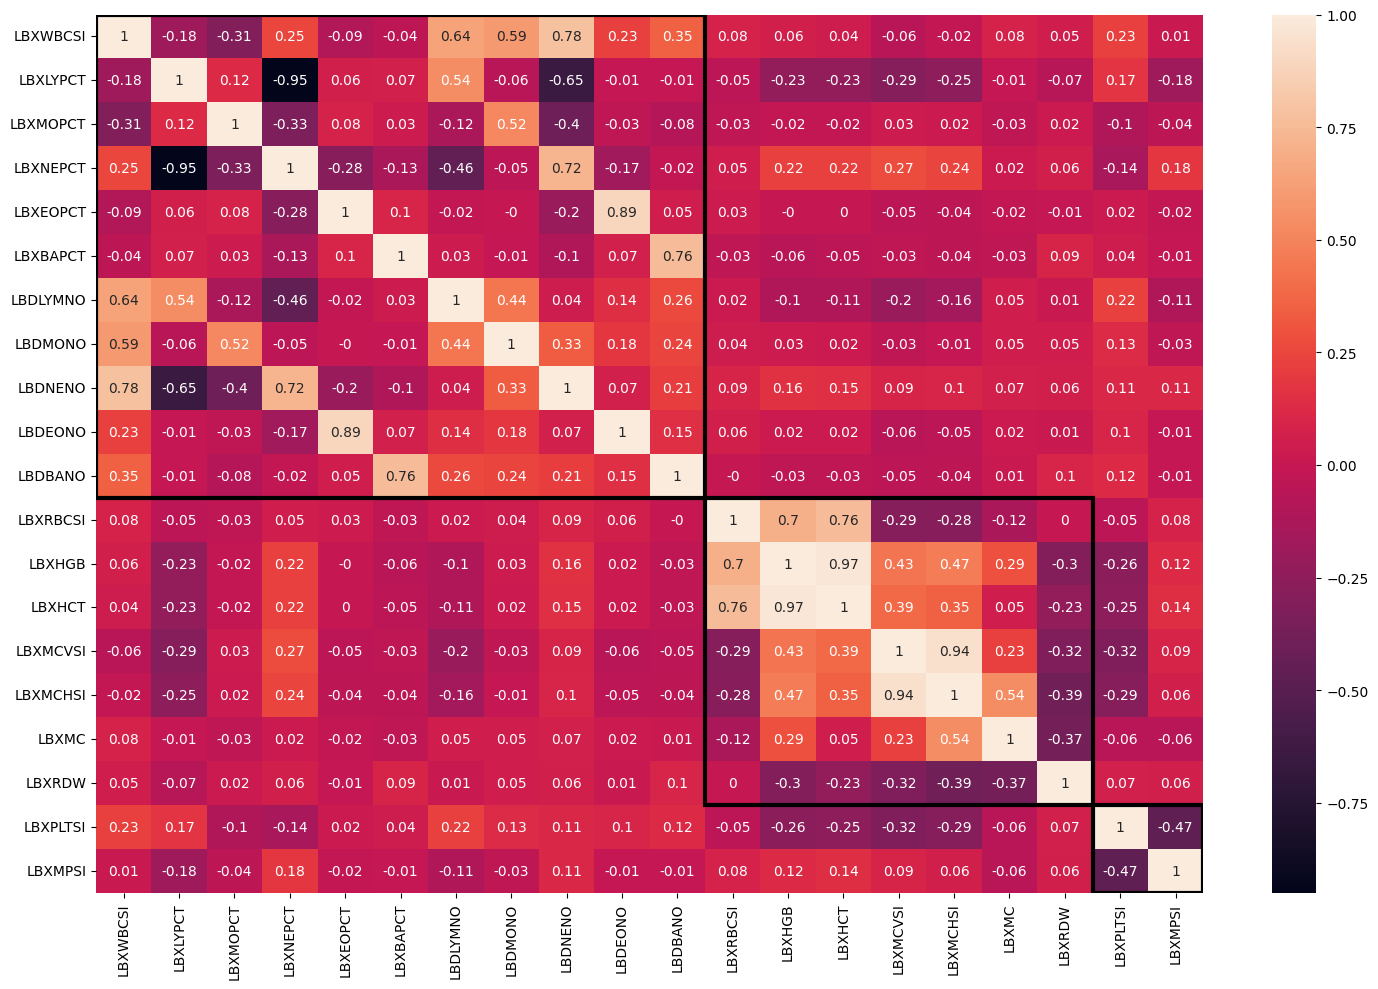

In [7]:
plt.figure(figsize=(15,10))
fig = sns.heatmap(cbc.iloc[:,1:].dropna().corr().round(2),annot=True)

whitec = Rectangle((0,0),11,11,fill=False,linewidth=3)
redc = Rectangle((11,11),7,7,fill=False,linewidth=3)
plaq = Rectangle((18,18),2,2,fill=False,linewidth=3)

for rect in [whitec,redc,plaq]:
    fig.add_patch(rect)

plt.tight_layout()
plt.show()

The three squares of interaction follow regular hematology behavior in literature:
1. White cells (upper square): white cells and subtypes.
2. Red cells (middle square): red cells and hemoglobin.
3. Plalelets (lower square): as is.

Depending on reference intervals and common use in medical literature, some variable may be dropped in order to reduce input dimensions.

---

# Standard Biochemistry Profile (BIOPRO)
* Category: Biochemistry profile.
* Range: 2007-2008
* Link: https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2007/DataFiles/BIOPRO_E.htm

Based on the Beckman Coulter methodology of counting and sizing (Beckman Coulter DxH).

In [8]:
biopro = pd.read_sas('BIOPRO_E.xpt')
biopro.describe()

SEQN       LBXSAL     LBDSALSI     LBXSATSI     LBXSASSI  \
count   6917.000000  6377.000000  6377.000000  6372.000000  6372.000000   
mean   46546.553853     4.247452    42.474518    25.204959    26.293158   
std     2929.611057     0.344066     3.440663    23.476135    18.902796   
min    41475.000000     1.200000    12.000000     4.000000     8.000000   
25%    44013.000000     4.000000    40.000000    16.000000    20.000000   
50%    46537.000000     4.300000    43.000000    20.000000    23.000000   
75%    49091.000000     4.500000    45.000000    28.000000    28.000000   
max    51623.000000     5.500000    55.000000   890.000000  1034.000000   

          LBXSAPSI       LBXSBU     LBDSBUSI       LBXSCA     LBDSCASI  ...  \
count  6375.000000  6375.000000  6375.000000  6375.000000  6375.000000  ...   
mean     81.453020    12.812863     4.574593     9.439827     2.359957  ...   
std      50.400766     5.743412     2.050416     0.379544     0.094886  ...   
min      14.000000     2.000000     0.710000     7.000000     1.750000  ...   
25%      57.000000     9.000000     3.210000     9.200000     2.300000  ...   
50%      70.000000    12.000000     4.280000     9.400000     2.350000  ...   
75%      88.000000    15.000000     5.360000     9.700000     2.425000  ...   
max     679.000000    72.000000    25.700000    11.500000     2.875000  ...   

            LBXSTR     LBDSTRSI       LBXSUA     LBDSUASI     LBXSNASI  \
count  6373.000000  6373.000000  6375.000000  6375.000000  6375.000000   
mean    152.942884     1.726734     5.455482   324.491796   139.255529   
std     131.909065     1.489252     1.432798    85.222480     2.437700   
min      16.000000     0.181000     1.700000   101.100000   114.000000   
25%      78.000000     0.881000     4.400000   261.700000   138.000000   
50%     119.000000     1.344000     5.300000   315.200000   139.000000   
75%     186.000000     2.100000     6.300000   374.700000   141.000000   
max    3281.000000    37.042000    13.100000   779.200000   160.000000   

           LBXSKSI     LBXSCLSI     LBXSOSSI       LBXSGB     LBDSGBSI  
count  6374.000000  6374.000000  6375.000000  6369.000000  6369.000000  
mean      3.971227   104.153279   278.162824     2.936709    29.367091  
std       0.331647     2.884384     5.301618     0.450268     4.502682  
min       2.500000    82.000000   228.000000     1.000000    10.000000  
25%       3.800000   103.000000   275.000000     2.600000    26.000000  
50%       4.000000   104.000000   278.000000     2.900000    29.000000  
75%       4.200000   106.000000   281.000000     3.200000    32.000000  
max       6.000000   120.000000   321.000000     6.500000    65.000000  

[8 rows x 37 columns]

<Axes: >

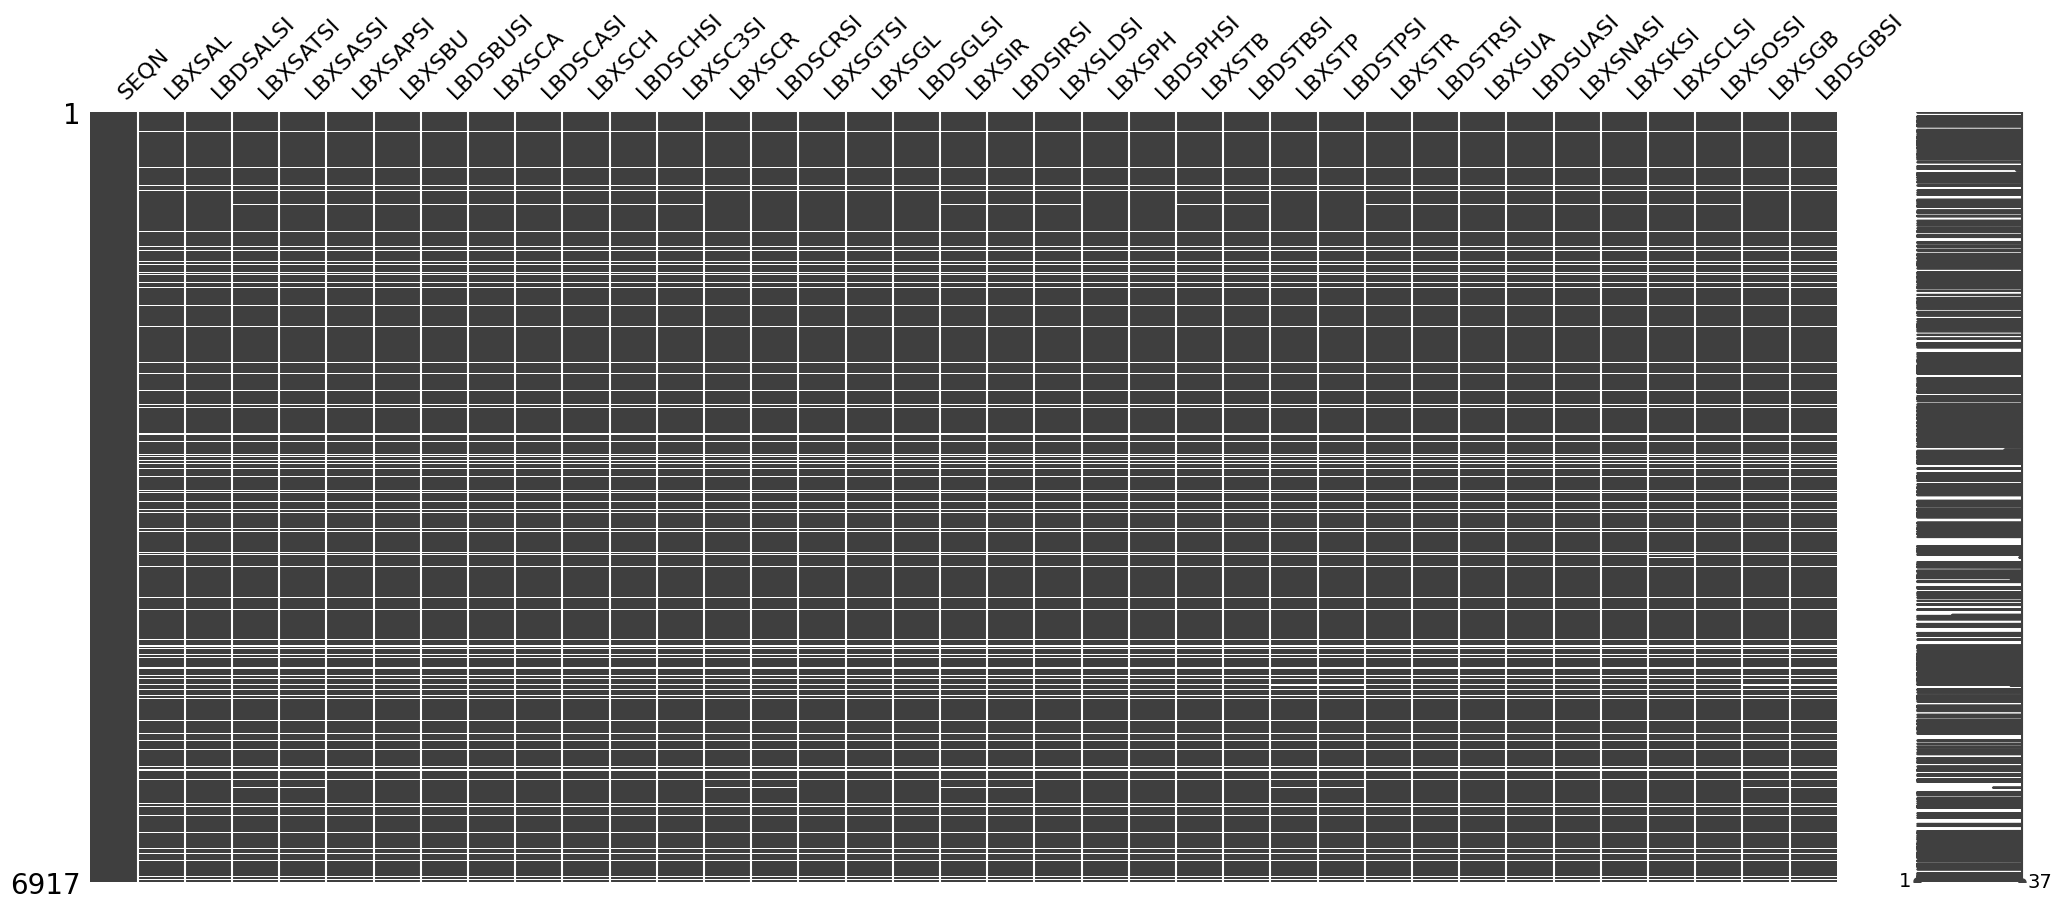

In [9]:
msno.matrix(biopro)

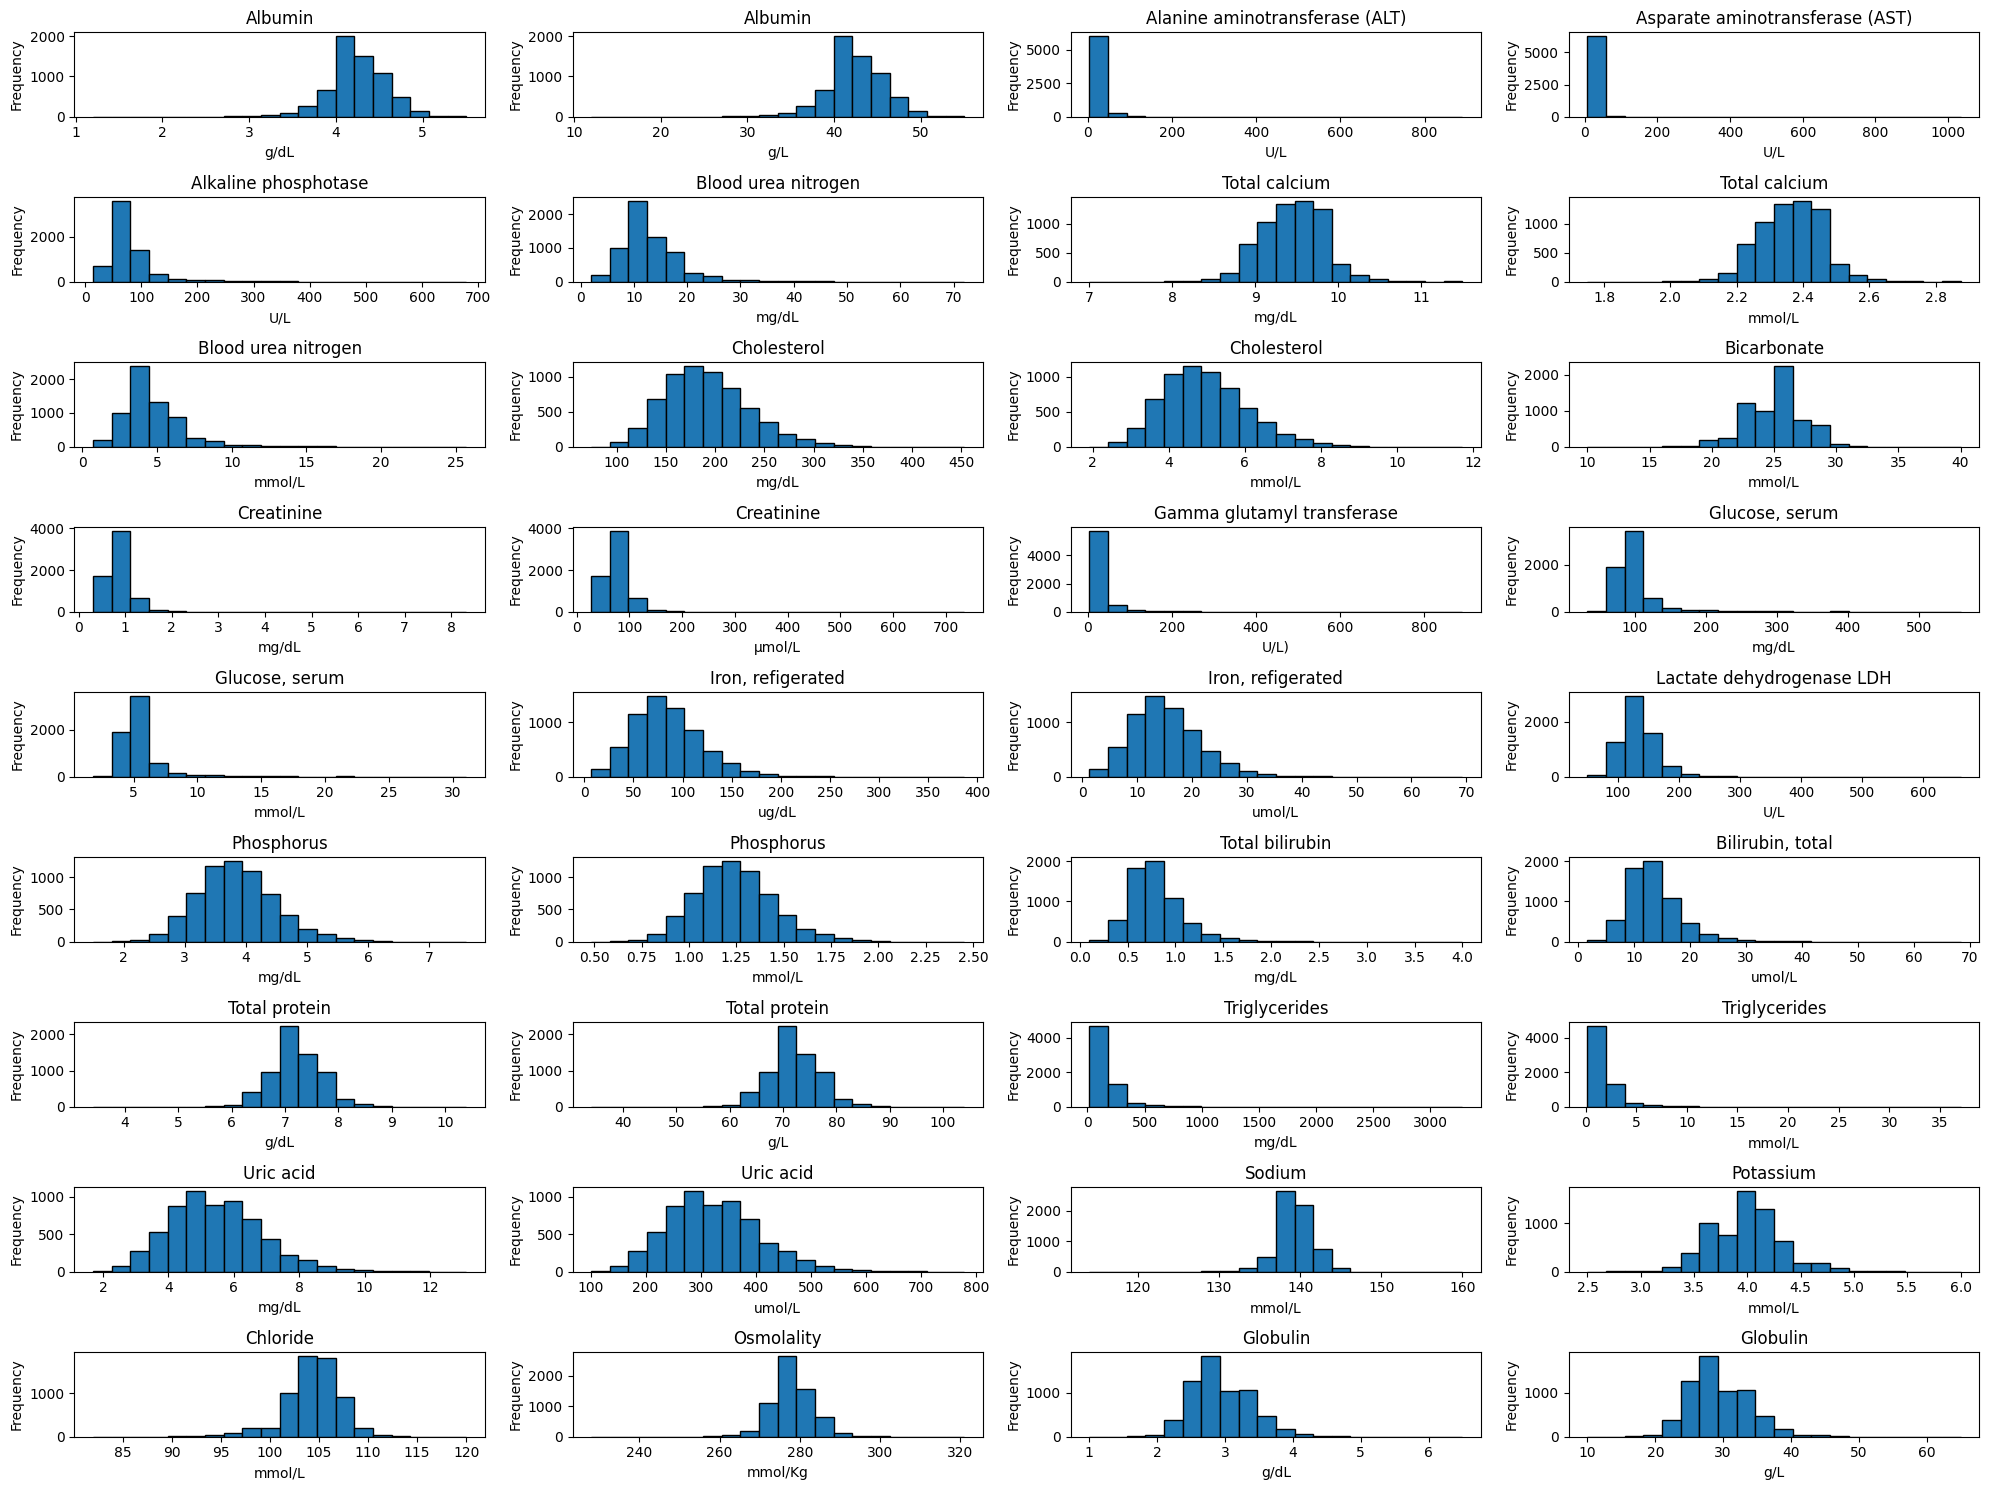

In [12]:
fig, axes = plt.subplots(9,4,figsize=(20,15))
axes = axes.flatten()

for i, (col, (name, unit)) in enumerate(metabio.items()):
    ax = axes[i]
    ax.hist(biopro[col].dropna(),bins=20,edgecolor='black')
    ax.set_title(name)
    ax.set_xlabel(unit)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()